These were run in Python 3 using the Anaconda distribution.

The dynamic equilibrium model is described in more detail here:

http://informationtransfereconomics.blogspot.com/2017/01/dynamic-equilibrium-presentation.html

Have fun,

Jason Smith

In [75]:
import numpy as np
import pylab as pl
from IEtools import *
import xlrd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Example: bitcoin

Here we read in the bitcoin exchange rate data and plot it. We take only the most recent data because the version of python IEtools used here could only look at two shocks.

In [76]:
filename='C:/econdata/btcUSDtimeseries_recent.xls'


book = xlrd.open_workbook(filename)
sheet = book.sheet_by_index(0)
outputList = []
outputName = 'USD/btc'
for rowIndex in range(sheet.nrows):
    outputList.append([sheet.cell(rowIndex,0).value, sheet.cell(rowIndex,1).value])
dataOutput =  np.array(outputList)
output = {'name':outputName,'data':dataOutput}

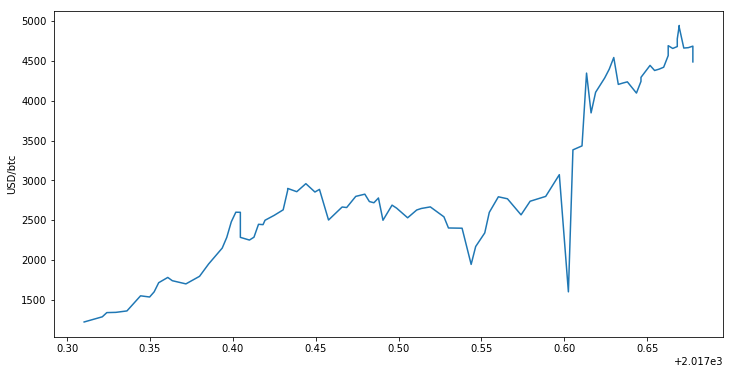

In [77]:
plotData = output['data']
plotType = pl.plot
plotScale = 1
plotLabel = output['name']
pl.figure(figsize=(12,6))
plotType(plotData[:,0],plotData[:,1]*plotScale)
pl.ylabel(plotLabel)
pl.show()

## Dynamic equilibrium model

This applies the entropy minimization method of finding the dynamic equilibrium.

In [78]:
forecastDuration = 0.25
forecastResolution = 100
forecastTime = np.array(list(range(int(output['data'][-1,0]*forecastResolution),int((output['data'][-1,0]+forecastDuration)*forecastResolution),1)))/forecastResolution

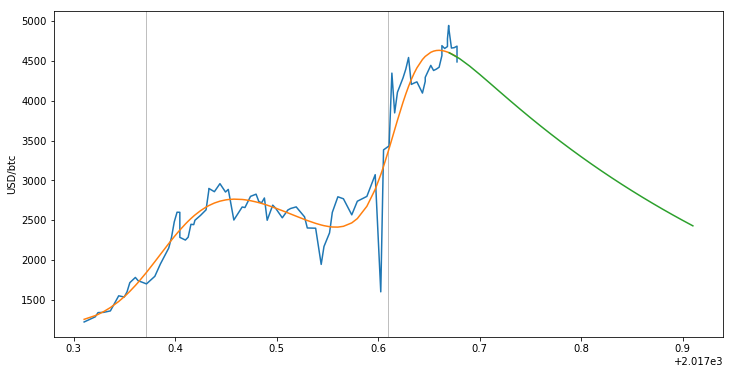

Dynamic equilibrium growth rate (entropy min) =  -277.74
Shock centers =  [ 2017.4  2017.6]
Shock widths =  [ 0.03  0.02]
Shock magnitudes =  [ 1.51  1.02]


In [79]:
temp = dynamic_equilibrium_optimize(output['data'],alphaRange=(-2.9,-2.4),binWidth=0.5,alphaDelta=0.001,method='brute')
transform = log_linear_transform(output['data'], temp)

fitFunction = two_shock

transform[:,1] = np.exp(transform[:,1])
guess = [1.0,-0.01,2017.35,1.0,-0.01,2017.6,0.0]
result = dynamic_eq_fit(fitFunction, transform, guess)

fitData = result['fit']
popt = result['params']
pcov = result['cov']      


forecastFit = np.array(list(map(lambda x:np.exp(fitFunction(x,*popt)),forecastTime)))

plotData[:,1] = np.exp(np.log(transform[:,1])+temp*(plotData[:,0]-plotData[0,0]))
plotScale = 1
plotLabel = output['name']
plotData2 = np.exp(np.log(fitData)+temp*(plotData[:,0]-plotData[0,0]))
plotData3 = np.exp(np.log(forecastFit)+temp*(forecastTime-plotData[0,0]))

pl.figure(figsize=(12,6))
for index in range(len(result['transitions'])):
    pl.axvline(x=result['transitions'][index],color='0.5',linewidth=0.5)   
pl.plot(plotData[:,0],plotData[:,1],plotData[:,0],plotData2,forecastTime,plotData3)
pl.ylabel(plotLabel)
pl.show()

print('Dynamic equilibrium growth rate (entropy min) = ',np.round(100*temp,decimals=2))
print('Shock centers = ',np.round(result['transitions'],decimals=1))
print('Shock widths = ',np.round(result['shock_widths'],decimals=2))
print('Shock magnitudes = ',np.round(result['shock_mags'],decimals=2))